### Load Data

In [1926]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import GradientBoostingRegressor



In [1927]:
# Read in data
train = pd.read_csv('/users/monicalondon/Downloads/8855_12352_bundle_archive/housing_train.csv')
test = pd.read_csv('/users/monicalondon/Downloads/8855_12352_bundle_archive/housing_test.csv')

In [1928]:
# Combine data
frames = [train, test]
data = pd.concat(frames)


### Preview data

In [1929]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [1930]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### Clean data

In [1931]:
# Drop unnecessary columns or columns with too few values
cols_to_drop = ['Id', 'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'MiscVal', 'FireplaceQu', 'GarageYrBlt', 'PoolArea']
def drop_unnecessary_cols(data=data, cols_to_drop=cols_to_drop):
    for i in cols_to_drop:
        data.drop([i], axis=1, inplace=True)
    return data

drop_unnecessary_cols()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,42,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,35,272,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,192,84,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,24,0,0,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,474,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,80,32,0,0,0,7,2006,WD,Normal,NaN


In [1932]:
# Drop values with no sale price

In [1933]:
data['SalePrice'].replace('', np.nan, inplace=True)
data.dropna(subset=['SalePrice'], inplace=True)

#### Deal with missing values

In [1934]:
# Which columns have missing values?
[col for col in data.columns if data[col].isnull().any()]

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [1935]:
# LotFrontage- fill missing LotFrontage values based on median LotArea/LotFrontage value
data['LotFrontage'] = data['LotFrontage'].fillna((data['LotArea']/data['LotFrontage']).median())

In [1936]:
# MasVnrType
print(data['MasVnrType'].value_counts())
# Fill missing MasVnrType values with None (mode)
data['MasVnrType'] = data['MasVnrType'].fillna('None')

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [1937]:
# MasVnrArea
print(data['MasVnrArea'].value_counts())
# Fill missing MasVnrArea values with 0 (mode)
data['MasVnrArea'] = data['MasVnrArea'].fillna(0.0)

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64


In [1938]:
# BsmtQual- there are only 37 missing values
print(len(data) - sum(data['BsmtQual'].value_counts()))
# Fill missing BsmtQual with None, assuming it is empty because there is no basement
data['BsmtQual'] = data['BsmtQual'].fillna('None')

37


In [1939]:
# BsmtCond - also only 37 missing values
print(len(data) - sum(data['BsmtCond'].value_counts()))
# Fill missing BsmtCond with None, assuming it is empty because there is no basement
data['BsmtCond'] = data['BsmtCond'].fillna('None')

37


In [1940]:
# BsmtExposure - only 38 missing values
print(len(data) - sum(data['BsmtExposure'].value_counts()))
# Fill missing BsmtExposure with None
data['BsmtExposure'] = data['BsmtExposure'].fillna('None')

38


In [1941]:
# BsmtFinType1 - only 38 missing values
print(len(data) - sum(data['BsmtFinType1'].value_counts()))
# Fill missing BsmtFinType1 with None
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')

37


In [1942]:
# BsmtFinType2 - only 38 missing values
print(len(data) - sum(data['BsmtFinType2'].value_counts()))
# Fill missing BsmtFinType2 with None
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')

38


In [1943]:
# Electrical - just 1 missing value
# Fill missing Electrical value with mode (SBrkr)
print(data['Electrical'].value_counts())
print(len(data) - sum(data['Electrical'].value_counts()))
data['Electrical'] = data['Electrical'].fillna('SBrkr')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
1


In [1945]:
# Electrical - change to Srkr or not 
data['Electrical'] = np.where((data.Electrical == 'SBrkr'), 1, data.Electrical)
data['Electrical'] = np.where((data.Electrical == 'FuseA'), 0, data.Electrical)
data['Electrical'] = np.where((data.Electrical == 'FuseF'), 0, data.Electrical)
data['Electrical'] = np.where((data.Electrical == 'FuseP'), 0, data.Electrical)
data['Electrical'] = np.where((data.Electrical == 'Mix'), 0, data.Electrical)

In [1946]:
# GarageType - 81 missing values. It is reasonable to believe that these homes don't have garages
# Fill missing GarageType with None
print(len(data) - sum(data['GarageType'].value_counts()))
data['GarageType'] = data['GarageType'].fillna('None')

81


In [1947]:
# GarageQual - 81 missing values.
# Fill missing GarageQual with None
print(len(data) - sum(data['GarageQual'].value_counts()))
data['GarageQual'] = data['GarageQual'].fillna('None')

81


In [1948]:
# Fill missing GarageCond with None
print(len(data) - sum(data['GarageCond'].value_counts()))
data['GarageCond'] = data['GarageCond'].fillna('None')

81


In [1949]:
# Fill missing GarageFinish with None
print(len(data) - sum(data['GarageFinish'].value_counts()))
data['GarageFinish'] = data['GarageFinish'].fillna('None')

81


#### Change data types

In [1950]:
# Change these numbers to strings
data['MSSubClass'] = data['MSSubClass'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [1951]:
# Change KitchenQual to numeric
data['KitchenQual'].unique()
data['KitchenQual'] = np.where((data.KitchenQual == 'Ex'), 5,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'Gd'), 4,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'TA'), 3,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'Fa'), 2,data.KitchenQual)

In [1952]:
# Change ExterQual to numeric
data['ExterQual'] = np.where((data.ExterQual == 'Ex'), 5,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'Gd'), 4,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'TA'), 3,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'Fa'), 2,data.ExterQual)

In [1953]:
# Change ExterCond to numeric
data['ExterCond'] = np.where((data.ExterCond == 'Ex'), 5,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Gd'), 4,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'TA'), 3,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Fa'), 2,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Po'), 1,data.ExterCond)

### EDA

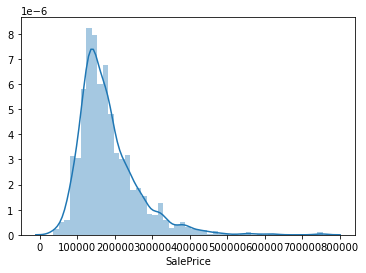

In [1954]:
sns.distplot(data['SalePrice']);

We can see that the Sale Price is not normally distributed, so we will need to do a log transformation

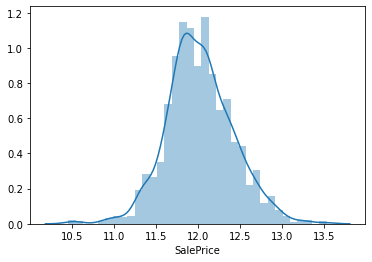

In [1955]:
sns.distplot(np.log1p(data['SalePrice']));

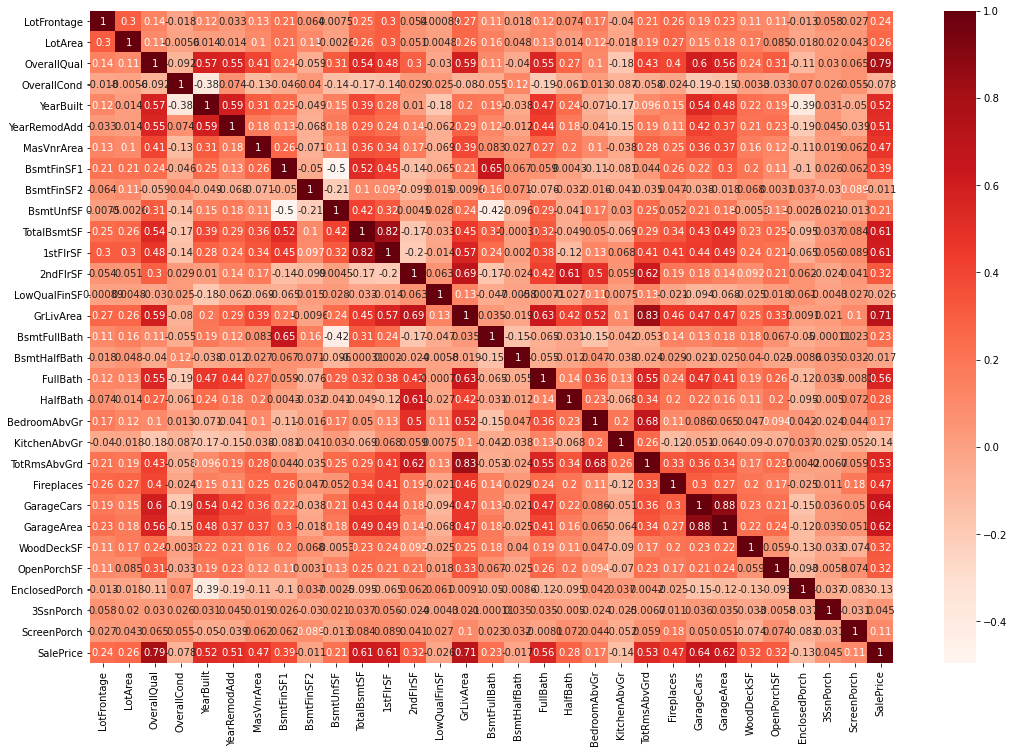

In [1956]:
# Plot heatmap of Pearson correlation
plt.figure(figsize = (18,12))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()


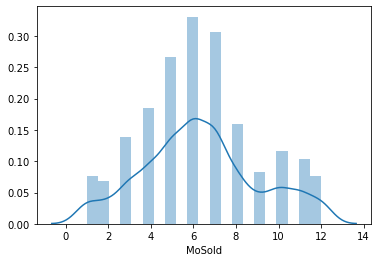

In [1957]:
# Distribution of months sold - we can see that summer months have the highest volume of sales
sns.distplot(data['MoSold']);

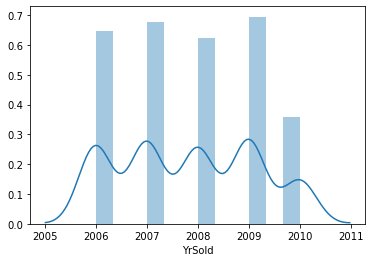

In [1958]:
# Distribution of Year Sold
sns.distplot(data['YrSold']);

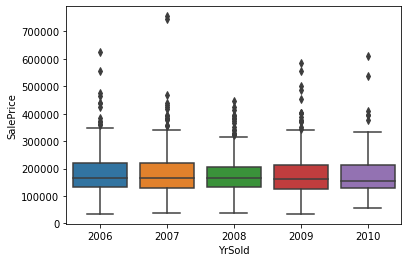

In [1959]:
# Boxplot of sale prices by year sold
sns.boxplot(x='YrSold', y='SalePrice', data=data)

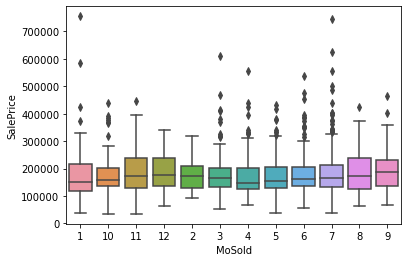

In [1960]:
sns.boxplot(x='MoSold', y='SalePrice', data=data)

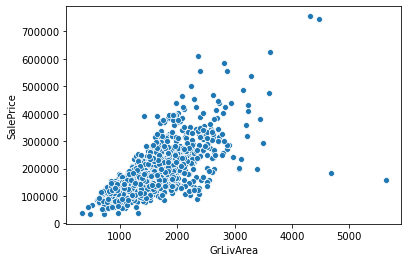

In [1961]:
# Living area vs Sale Price
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data);

As expected, there is a clear positive correlation between GrLivArea, which represents square footage, and the sale price.

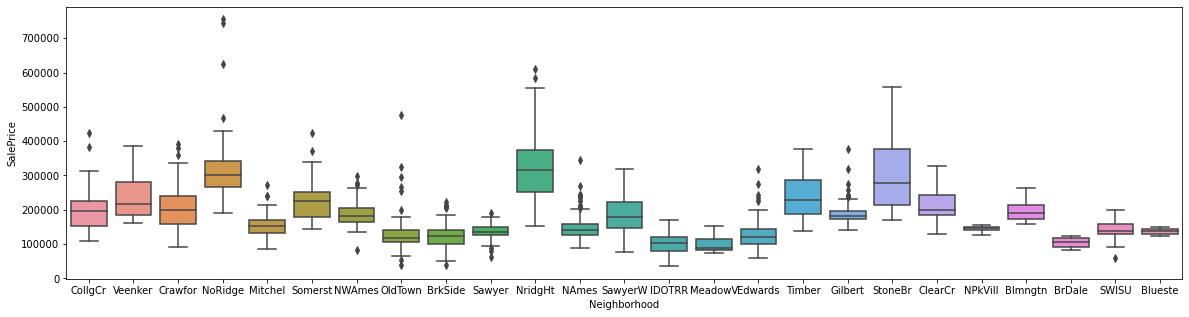

In [1962]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Neighborhood', y='SalePrice', data=data);

We can see that there is a higher range in pricing for some of the higher priced neighborhoods

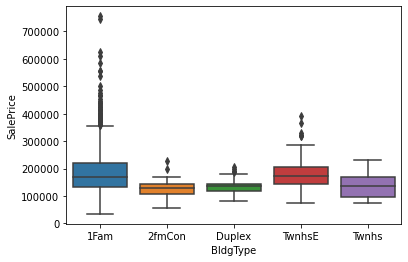

In [1963]:
sns.boxplot(x='BldgType', y='SalePrice', data=data);

Single Family Homes, represented as 1Fam, have the highest range of sale prices.

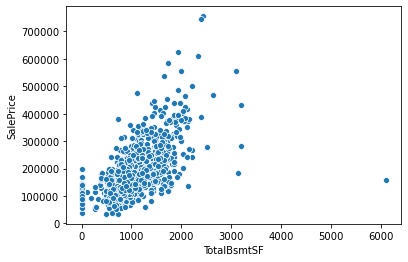

In [1964]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=data);

Total basement square footage also appears positively correlated with sales price.

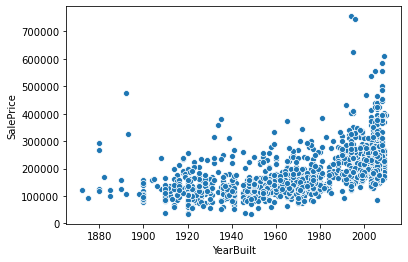

In [1965]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=data);

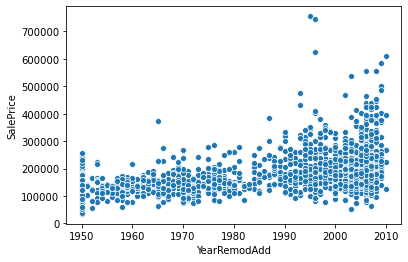

In [1966]:
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=data);

### Baseline Model
Based on domain knowledge, we will use the following features for our baseline model
1) Neighorhood
2) GrLivArea
3) OverallQual
4) LotArea
5) YearRemodAdd
6) BldgType
7) TotalBsmtSF

In [1967]:
# Convert neighborhood to categorical
neighborhood_cat = pd.get_dummies(data.Neighborhood, prefix='neigh')
data2 = pd.concat([data, pd.get_dummies(data['Neighborhood'], prefix='neigh', drop_first=True)], axis=1)
data2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,1,0,0,0,0,0,0,0,0,0


In [1968]:
# Convert BldgType to categorical
data2 = pd.concat([data2, pd.get_dummies(data2['BldgType'], prefix='BldgType', drop_first=True)], axis=1)

In [1969]:
# Train test split
# Separate X and y
X = data2[['neigh_Blueste', 'neigh_BrDale', 'neigh_BrkSide', 'neigh_ClearCr', 
          'neigh_CollgCr', 'neigh_Crawfor', 'neigh_Edwards', 'neigh_Gilbert', 'neigh_IDOTRR', 'neigh_MeadowV',
          'neigh_Mitchel', 'neigh_NAmes', 'neigh_NoRidge', 'neigh_NridgHt', 'neigh_OldTown', 'neigh_SWISU', 'neigh_Sawyer', 'neigh_SawyerW', 'neigh_Somerst', 
          'neigh_StoneBr', 'neigh_Timber', 'neigh_Veenker', 'BldgType_2fmCon', 'BldgType_Duplex', 
          'BldgType_Twnhs', 'BldgType_TwnhsE','GrLivArea', 'OverallQual', 'LotArea', 'YearRemodAdd', 'TotalBsmtSF']]
y = data2['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1970]:
# Linear Regression Baseline Model
model_one = LinearRegression()
print('Model got an average score of R2: {}'.format(
    cross_val_score(model_one, X_train, y_train, cv=10).mean()))

Model got an average score of R2: 0.785349215663297


In [1971]:
# RMSE- Linear Reg
lin_mod = LinearRegression().fit(X_train,y_train)
y_pred = lin_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False)

33558.005673593776

In [1972]:
# Random Forest Regressor Baseline Model
rf = RandomForestRegressor()
print('Model got an average score of R2: {}'.format(
    cross_val_score(rf, X_train, y_train, cv=10).mean()))

Model got an average score of R2: 0.8089383305623453


In [1973]:
# RMSE- RF
rf_mod = RandomForestRegressor().fit(X_train,y_train)
rf_y_pred = rf_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, rf_y_pred, squared=False)

27715.43229600836

In [1974]:
# Gradient Boosted Regressor Baseline Model
gbr = GradientBoostingRegressor()
print('Model got an average score of R2: {}'.format(
    cross_val_score(gbr, X_train, y_train, cv=10).mean()))

Model got an average score of R2: 0.8320036450635501


In [1975]:
# RMSE- GBR
gbr_mod = GradientBoostingRegressor().fit(X_train,y_train)
gbr_y_pred = gbr_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, gbr_y_pred, squared=False)

26131.08515212586

In [1976]:
# Lasso Baseline Model
lasso = Lasso(alpha=0.1, normalize=True)
print('Model got an average score of R2: {}'.format(
    cross_val_score(lasso, X_train, y_train, cv=10).mean()))

Model got an average score of R2: 0.7853594198221129


In [1977]:
# RMSE- Lasso
clf = Lasso(alpha=0.1, normalize=True).fit(X_train, y_train)
lasso_pred = clf.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, lasso_pred, squared=False)

33558.27234772411

In [1979]:
# RMSE - Ridge
rid = Ridge(normalize=True).fit(X_train, y_train)
rid_pred = rid.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, rid_pred, squared=False)

41590.9660387998

#### Plot Residuals of Baseline Plots

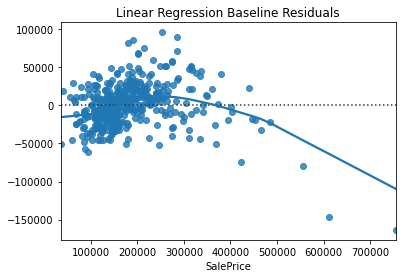

In [1980]:
sns.residplot(y_test, y_pred, lowess=True)
plt.title('Linear Regression Baseline Residuals');

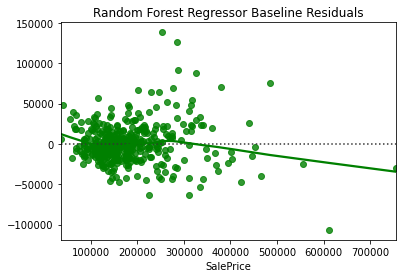

In [1981]:
sns.residplot(y_test, rf_y_pred, lowess=True, color='g')
plt.title('Random Forest Regressor Baseline Residuals');

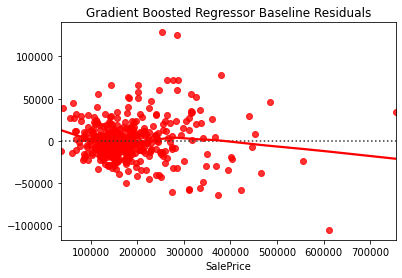

In [1982]:
sns.residplot(y_test, gbr_y_pred, lowess=True, color='r')
plt.title('Gradient Boosted Regressor Baseline Residuals');

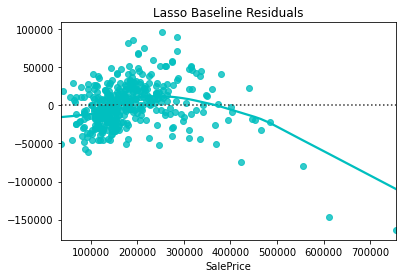

In [1983]:
sns.residplot(y_test, lasso_pred, lowess=True, color='c')
plt.title('Lasso Baseline Residuals');

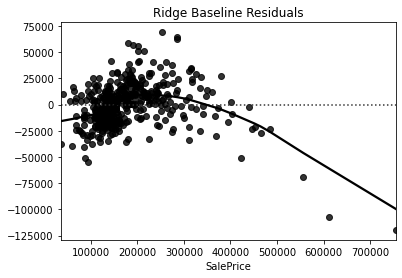

In [1984]:
sns.residplot(y_test, rid_pred, lowess=True, color='k')
plt.title('Ridge Baseline Residuals');

#### Explore outliers

In [1985]:
data2[data2.GrLivArea > 4000]['SalePrice']

523     184750.0
691     755000.0
1182    745000.0
1298    160000.0
Name: SalePrice, dtype: float64

In [1986]:
# Delete the above outliers.
data2.drop([523, 691, 1182, 1298], inplace=True)

### Feature Engineering
Now we will do some more feature engineering to improve our model

In [1987]:
# Combine full and half bathrooms
data2['Total_Bathrooms'] = data2['FullBath'] + data2['HalfBath']*.5

In [1988]:
# Drop full & half bathrooms
data2.drop(['FullBath'], axis=1, inplace=True)
data2.drop(['HalfBath'], axis=1, inplace=True)

In [1989]:
# Combine basement full and half bathrooms
data2['Basement_Total_Bathrooms'] = data2['BsmtFullBath'] + data2['BsmtHalfBath']*.5

In [1990]:
# Drop basement full & half bathrooms
data2.drop(['BsmtFullBath'], axis=1, inplace=True)
data2.drop(['BsmtHalfBath'], axis=1, inplace=True)

In [1991]:
# What percent of properties have been remodeled?
(data2['YearRemodAdd'] == data2['YearBuilt']).sum()/len(data)

0.5219178082191781

In [1992]:
# Create New Feature Subtracting Year Sold from Most Recent of Year Built or Remodeled
data2['Age_Of_Interior'] = data2['YrSold'].astype(int) - data2[["YearBuilt", "YearRemodAdd"]].max(axis=1)


### Models Round2
Removed YearRemodAdd and Added 'GarageCars', 'Age_Of_Interior', 'Basement_Total_Bathrooms', 'Total_Bathrooms'

In [1993]:
# Train test split
# Separate X and y
X = data2[['neigh_Blueste', 'neigh_BrDale', 'neigh_BrkSide', 'neigh_ClearCr', 
          'neigh_CollgCr', 'neigh_Crawfor', 'neigh_Edwards', 'neigh_Gilbert', 'neigh_IDOTRR', 'neigh_MeadowV',
          'neigh_Mitchel', 'neigh_NAmes', 'neigh_NoRidge', 'neigh_NridgHt', 'neigh_OldTown', 'neigh_SWISU', 'neigh_Sawyer', 'neigh_SawyerW', 'neigh_Somerst', 
          'neigh_StoneBr', 'neigh_Timber', 'neigh_Veenker', 'BldgType_2fmCon', 'BldgType_Duplex', 
          'BldgType_Twnhs', 'BldgType_TwnhsE','GrLivArea', 'OverallQual', 'LotArea', 'TotalBsmtSF', 'GarageCars', 'Age_Of_Interior', 'Basement_Total_Bathrooms', 'Total_Bathrooms']]
y = data2['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1994]:
# RMSE- Linear Reg
lin_mod = LinearRegression().fit(X_train,y_train)
y_pred = lin_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False)

25897.25205854596

In [1995]:
# RMSE- RF
rf_mod = RandomForestRegressor().fit(X_train,y_train)
rf_y_pred = rf_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, rf_y_pred, squared=False)

24776.68538527796

In [1996]:
# RMSE- GBR
gbr_mod = GradientBoostingRegressor(learning_rate=0.13, n_estimators=200, max_depth = 3, min_samples_split = 45, min_samples_leaf = 2, random_state=42).fit(X_train,y_train)
gbr_y_pred = gbr_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, gbr_y_pred, squared=False)

23721.822004602353

In [1997]:
# RMSE- Lasso
clf = Lasso(normalize=True).fit(X_train, y_train)
lasso_pred = clf.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, lasso_pred, squared=False)

25872.02457630051

In [1998]:
# RMSE- Ridge
rid = Ridge(normalize=True).fit(X_train, y_train)
rid_pred = rid.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, rid_pred, squared=False)

28168.918897973865

### Get dummies for remaining categorical variables

In [1999]:
# Drop Neighborhood and BldgType (already turned into dummies)
data2.drop(['BldgType'], axis=1, inplace=True)
data2.drop(['Neighborhood'], axis=1, inplace=True)

In [2000]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 97 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MSSubClass                1456 non-null   object 
 1   MSZoning                  1456 non-null   object 
 2   LotFrontage               1456 non-null   float64
 3   LotArea                   1456 non-null   int64  
 4   Street                    1456 non-null   object 
 5   LotShape                  1456 non-null   object 
 6   LandContour               1456 non-null   object 
 7   Utilities                 1456 non-null   object 
 8   LotConfig                 1456 non-null   object 
 9   LandSlope                 1456 non-null   object 
 10  Condition1                1456 non-null   object 
 11  Condition2                1456 non-null   object 
 12  HouseStyle                1456 non-null   object 
 13  OverallQual               1456 non-null   int64  
 14  OverallC

In [2001]:
# MSSubClass
data3 = pd.concat([data2, pd.get_dummies(data2['MSSubClass'], prefix='MSSubClass', drop_first=True)], axis=1)
# MSZoning
data4 = pd.concat([data3, pd.get_dummies(data2['MSZoning'], prefix='MSZoning', drop_first=True)], axis=1)
# Street
data5 = pd.concat([data4, pd.get_dummies(data2['Street'], prefix='Street', drop_first=True)], axis=1)
# LotShape
data6 = pd.concat([data5, pd.get_dummies(data2['LotShape'], prefix='LotShape', drop_first=True)], axis=1)
# LandContour
data7 = pd.concat([data6, pd.get_dummies(data2['LandContour'], prefix='LandContour', drop_first=True)], axis=1)
# Utilities
data8 = pd.concat([data7, pd.get_dummies(data2['Utilities'], prefix='Utilities', drop_first=True)], axis=1)
# LotConfig
data9 = pd.concat([data8, pd.get_dummies(data2['LotConfig'], prefix='LotConfig', drop_first=True)], axis=1)
# LandSlope
data10 = pd.concat([data9, pd.get_dummies(data2['LandSlope'], prefix='LandSlope', drop_first=True)], axis=1)
# Condition1
data11 = pd.concat([data10, pd.get_dummies(data2['Condition1'], prefix='Condition1', drop_first=True)], axis=1)
# Condition2
data12 = pd.concat([data11, pd.get_dummies(data2['Condition2'], prefix='Condition2', drop_first=True)], axis=1)
# HouseStyle
data13 = pd.concat([data12, pd.get_dummies(data2['HouseStyle'], prefix='HouseStyle', drop_first=True)], axis=1)
# RoofStyle
data14 = pd.concat([data13, pd.get_dummies(data2['RoofStyle'], prefix='RoofStyle', drop_first=True)], axis=1)
# RoofMatl
data15 = pd.concat([data14, pd.get_dummies(data2['RoofMatl'], prefix='RoofMatl', drop_first=True)], axis=1)
# Exterior1st
data16 = pd.concat([data15, pd.get_dummies(data2['Exterior1st'], prefix='Exterior1st', drop_first=True)], axis=1)
# Exterior2nd
data17 = pd.concat([data16, pd.get_dummies(data2['Exterior2nd'], prefix='Exterior2nd', drop_first=True)], axis=1)
# MasVnrType
data18 = pd.concat([data17, pd.get_dummies(data2['MasVnrType'], prefix='MasVnrType', drop_first=True)], axis=1)
# ExterQual
data19 = pd.concat([data18, pd.get_dummies(data2['ExterQual'], prefix='ExterQual', drop_first=True)], axis=1)
# ExterCond
data20 = pd.concat([data19, pd.get_dummies(data2['ExterCond'], prefix='ExterCond', drop_first=True)], axis=1)
# Foundation
data21 = pd.concat([data20, pd.get_dummies(data2['Foundation'], prefix='Foundation', drop_first=True)], axis=1)
# BsmtQual
data22 = pd.concat([data21, pd.get_dummies(data2['BsmtQual'], prefix='BsmtQual', drop_first=True)], axis=1)
# BsmtCond
data23 = pd.concat([data22, pd.get_dummies(data2['BsmtCond'], prefix='BsmtCond', drop_first=True)], axis=1)
# BsmtExposure
data24= pd.concat([data23, pd.get_dummies(data2['BsmtExposure'], prefix='BsmtExposure', drop_first=True)], axis=1)
# BsmtFinType1
data25 = pd.concat([data24, pd.get_dummies(data2['BsmtFinType1'], prefix='BsmtFinType1', drop_first=True)], axis=1)
# BsmtFinType2
data26 = pd.concat([data25, pd.get_dummies(data2['BsmtFinType2'], prefix='BsmtFinType2', drop_first=True)], axis=1)
# Heating
data27 = pd.concat([data26, pd.get_dummies(data2['Heating'], prefix='Heating', drop_first=True)], axis=1)
# HeatingQC
data28 = pd.concat([data27, pd.get_dummies(data2['HeatingQC'], prefix='HeatingQC', drop_first=True)], axis=1)
# CentralAir
data29 = pd.concat([data28, pd.get_dummies(data2['CentralAir'], prefix='CentralAir', drop_first=True)], axis=1)
# KitchenQual
data31 = pd.concat([data30, pd.get_dummies(data2['KitchenQual'], prefix='KitchenQual', drop_first=True)], axis=1)
# Functional
data32 = pd.concat([data31, pd.get_dummies(data2['Functional'], prefix='Functional', drop_first=True)], axis=1)
# GarageType
data33 = pd.concat([data32, pd.get_dummies(data2['GarageType'], prefix='GarageType', drop_first=True)], axis=1)
# GarageFinish
data34 = pd.concat([data33, pd.get_dummies(data2['GarageFinish'], prefix='GarageFinish', drop_first=True)], axis=1)
# GarageQual
data35 = pd.concat([data34, pd.get_dummies(data2['GarageQual'], prefix='GarageQual', drop_first=True)], axis=1)
# GarageCond
data36 = pd.concat([data35, pd.get_dummies(data2['GarageCond'], prefix='GarageCond', drop_first=True)], axis=1)
# PavedDrive
data37 = pd.concat([data36, pd.get_dummies(data2['PavedDrive'], prefix='PavedDrive', drop_first=True)], axis=1)
# MoSold
data38 = pd.concat([data37, pd.get_dummies(data2['MoSold'], prefix='MoSold', drop_first=True)], axis=1)
# YrSold
data39 = pd.concat([data38, pd.get_dummies(data2['YrSold'], prefix='YrSold', drop_first=True)], axis=1)
# SaleType
data40 = pd.concat([data39, pd.get_dummies(data2['SaleType'], prefix='SaleType', drop_first=True)], axis=1)
# SaleCondition
data41 = pd.concat([data40, pd.get_dummies(data2['SaleCondition'], prefix='SaleCondition', drop_first=True)], axis=1)


In [2002]:
data41.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 302 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   MSSubClass                object 
 1   MSZoning                  object 
 2   LotFrontage               float64
 3   LotArea                   int64  
 4   Street                    object 
 5   LotShape                  object 
 6   LandContour               object 
 7   Utilities                 object 
 8   LotConfig                 object 
 9   LandSlope                 object 
 10  Condition1                object 
 11  Condition2                object 
 12  HouseStyle                object 
 13  OverallQual               int64  
 14  OverallCond               int64  
 15  YearBuilt                 int64  
 16  YearRemodAdd              int64  
 17  RoofStyle                 object 
 18  RoofMatl                  object 
 19  Exterior1st               object 
 20  Exterior2nd               obj

In [2003]:
# Drop original categorical variables
data41.drop(['MSSubClass'], axis=1, inplace=True)
data41.drop(['MSZoning'], axis=1, inplace=True)
data41.drop(['Street'], axis=1, inplace=True)
data41.drop(['LotShape'], axis=1, inplace=True)
data41.drop(['LotConfig'], axis=1, inplace=True)
data41.drop(['Condition1'], axis=1, inplace=True)
data41.drop(['Condition2'], axis=1, inplace=True)
data41.drop(['HouseStyle'], axis=1, inplace=True)
data41.drop(['RoofStyle'], axis=1, inplace=True)
data41.drop(['RoofMatl'], axis=1, inplace=True)
data41.drop(['Exterior1st'], axis=1, inplace=True)
data41.drop(['Exterior2nd'], axis=1, inplace=True)
data41.drop(['MasVnrType'], axis=1, inplace=True)
data41.drop(['ExterQual'], axis=1, inplace=True)
data41.drop(['Foundation'], axis=1, inplace=True)
data41.drop(['BsmtQual'], axis=1, inplace=True)
data41.drop(['BsmtCond'], axis=1, inplace=True)
data41.drop(['BsmtExposure'], axis=1, inplace=True)
data41.drop(['BsmtFinType1'], axis=1, inplace=True)
data41.drop(['BsmtFinType2'], axis=1, inplace=True)
data41.drop(['Heating'], axis=1, inplace=True)
data41.drop(['HeatingQC'], axis=1, inplace=True)
data41.drop(['CentralAir'], axis=1, inplace=True)
data41.drop(['KitchenQual'], axis=1, inplace=True)
data41.drop(['Functional'], axis=1, inplace=True)
data41.drop(['GarageType'], axis=1, inplace=True)
data41.drop(['GarageFinish'], axis=1, inplace=True)
data41.drop(['GarageQual'], axis=1, inplace=True)
data41.drop(['GarageCond'], axis=1, inplace=True)
data41.drop(['PavedDrive'], axis=1, inplace=True)
data41.drop(['MoSold'], axis=1, inplace=True)
data41.drop(['YrSold'], axis=1, inplace=True)
data41.drop(['SaleType'], axis=1, inplace=True)
data41.drop(['SaleCondition'], axis=1, inplace=True)

In [2004]:
data41.drop(['LandContour'], axis=1, inplace=True)
data41.drop(['Utilities'], axis=1, inplace=True)
data41.drop(['LandSlope'], axis=1, inplace=True)
data41.drop(['ExterCond'], axis=1, inplace=True)
data41.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 264 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   LotFrontage               float64
 1   LotArea                   int64  
 2   OverallQual               int64  
 3   OverallCond               int64  
 4   YearBuilt                 int64  
 5   YearRemodAdd              int64  
 6   MasVnrArea                float64
 7   BsmtFinSF1                float64
 8   BsmtFinSF2                float64
 9   BsmtUnfSF                 float64
 10  TotalBsmtSF               float64
 11  Electrical                object 
 12  1stFlrSF                  int64  
 13  2ndFlrSF                  int64  
 14  LowQualFinSF              int64  
 15  GrLivArea                 int64  
 16  BedroomAbvGr              int64  
 17  KitchenAbvGr              int64  
 18  TotRmsAbvGrd              int64  
 19  Fireplaces                int64  
 20  GarageCars                flo

### Model Round 3: All cat variables converted to dummy

In [2005]:
X = data41.drop(['SalePrice'], axis=1)
y = data41['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2006]:
# RMSE- Linear Reg
lin_mod = LinearRegression().fit(X_train,y_train)
y_pred = lin_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False)

ValueError: could not convert string to float: 'SBrkr'

In [1890]:
# RMSE- RF
rf_mod = RandomForestRegressor().fit(X_train,y_train)
rf_y_pred = rf_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, rf_y_pred, squared=False)

22234.570764005704

In [1891]:
# RMSE- GBR
gbr_mod = GradientBoostingRegressor().fit(X_train,y_train)
gbr_y_pred = gbr_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, gbr_y_pred, squared=False)

20348.380542121547

Including all of the features caused the model to perform worse.

In [1896]:
reg = LassoCV(normalize=True)
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 17.254601
Best score using built-in LassoCV: 0.926457


In [1897]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 111 variables and eliminated the other 151 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

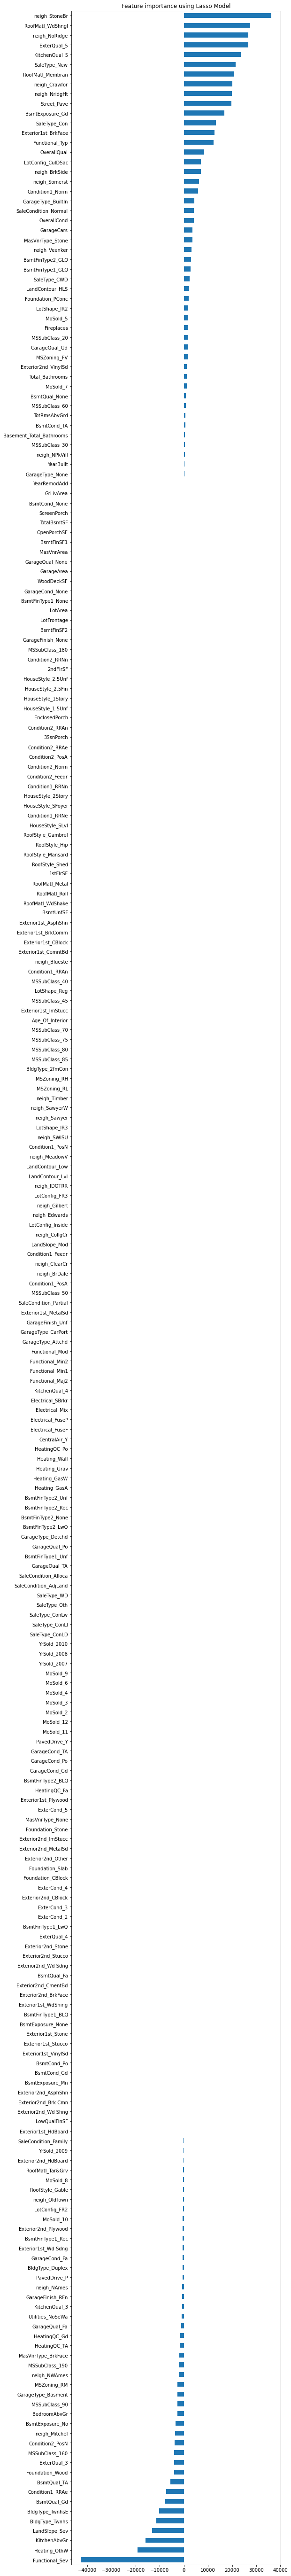

In [1898]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 100.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [1899]:
ridge = RidgeCV(normalize=True)
ridge.fit(X, y)
print("Best alpha using built-in RidgeCV: %f" % ridge.alpha_)
print("Best score using built-in RidgeCV: %f" %ridge.score(X,y))
coef = pd.Series(ridge.coef_, index = X.columns)

Best alpha using built-in RidgeCV: 0.100000
Best score using built-in RidgeCV: 0.935077


Text(0.5, 1.0, 'Feature Importance using Ridge Model')

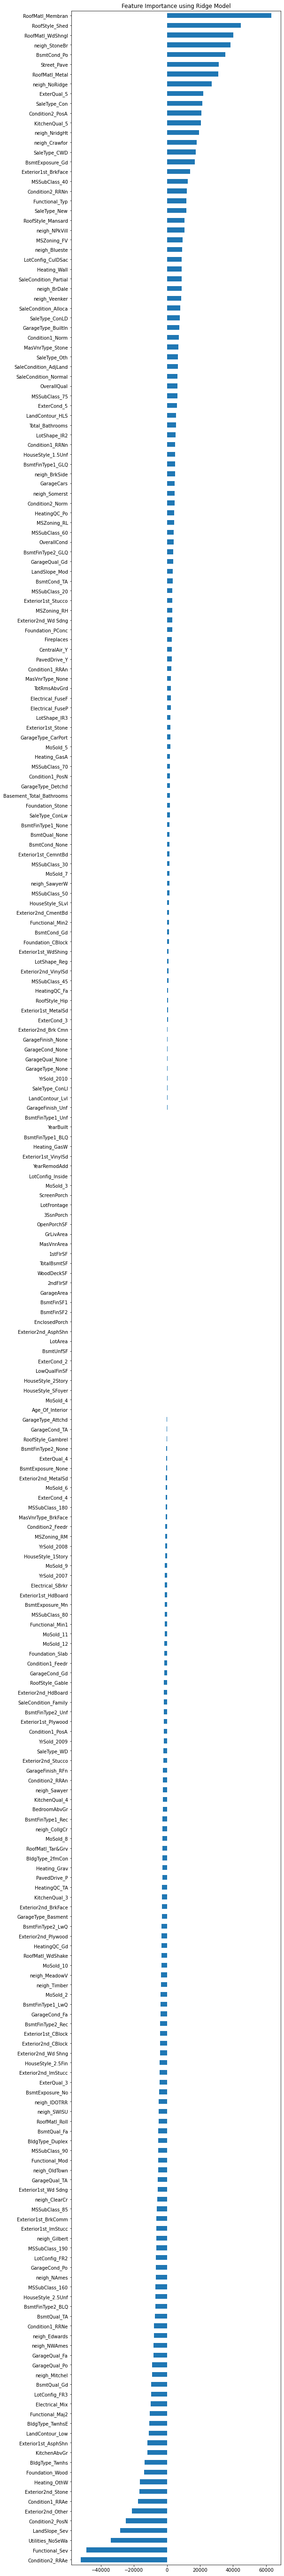

In [1900]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 100.0)
imp_coef.plot(kind = "barh")
plt.title("Feature Importance using Ridge Model")

Now we need to explore why the Ridge model states three roof variables as having the highest positive feature importance.

In [1922]:
data41['RoofMatl_Membran'].value_counts()

0    1455
1       1
Name: RoofMatl_Membran, dtype: int64

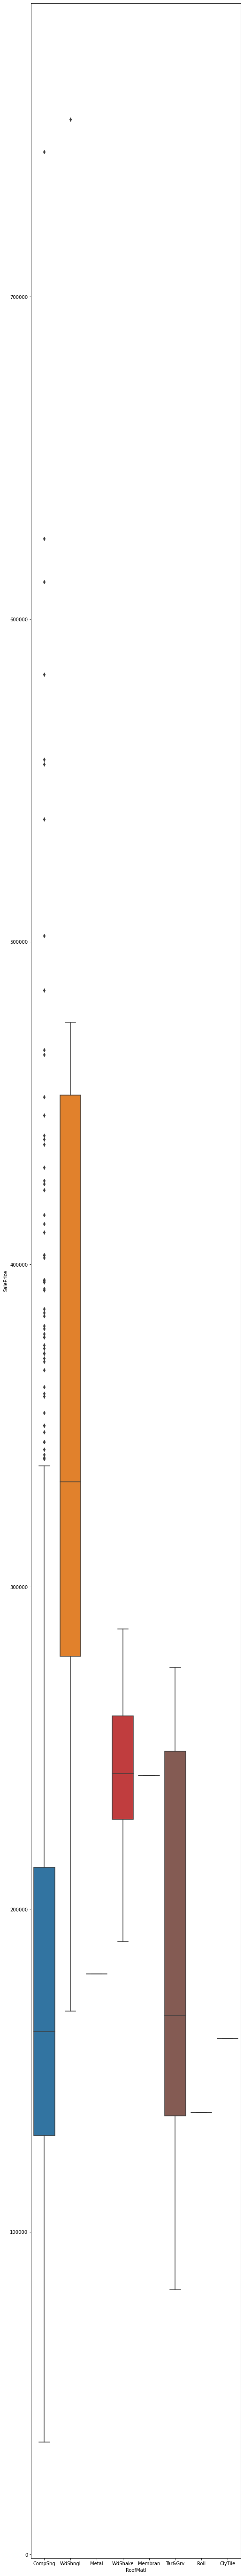

In [1925]:
sns.boxplot(x='RoofMatl', y='SalePrice', data=data)

In [1913]:
# RMSE- Lasso using best alpha
lasso_mod = Lasso(alpha=0.17254601, tol=0.008, normalize=True).fit(X_train,y_train)
lasso_y_pred = lasso_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, lasso_y_pred, squared=False)

24281.249455047106

In [1902]:
# RMSE- Ridge using best alpha
ridge_mod = Ridge(alpha=0.1, normalize=True).fit(X_train,y_train)
ridge_y_pred = ridge_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, ridge_y_pred, squared=False)

22940.8467331986

In [1914]:
# Current overall best error rate
20348/data2['SalePrice'].mean()

0.11294954579446827

### Model 4
Our best model so far is one with domain knowledge based feature selection. We will combine this features deemed important by the Ridge model.

In [1757]:
data41.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 264 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   LotFrontage               float64
 1   LotArea                   int64  
 2   OverallQual               int64  
 3   OverallCond               int64  
 4   YearBuilt                 int64  
 5   YearRemodAdd              int64  
 6   MasVnrArea                float64
 7   BsmtFinSF1                float64
 8   BsmtFinSF2                float64
 9   BsmtUnfSF                 float64
 10  TotalBsmtSF               float64
 11  1stFlrSF                  int64  
 12  2ndFlrSF                  int64  
 13  LowQualFinSF              int64  
 14  GrLivArea                 int64  
 15  BedroomAbvGr              int64  
 16  KitchenAbvGr              int64  
 17  TotRmsAbvGrd              int64  
 18  Fireplaces                int64  
 19  GarageCars                float64
 20  GarageArea                flo

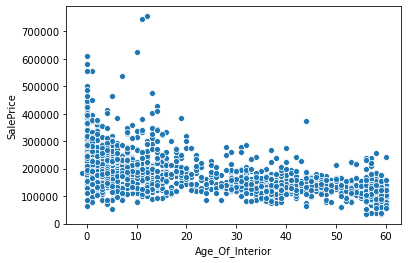

In [1756]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.scatterplot(x='Age_Of_Interior', y='SalePrice', data=data2)
